In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from scipy import stats

Problem 1: Clustering



A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [16]:
first_dataset=pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
first_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
first_dataset.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


Observation:

Based on intial records observed in top 5 and bottom 5, the data looks fine.

In [5]:
first_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.5 KB


Observation:

1. There are 7 variables and 210 records.
2. All the variables in the datset is numeric type.

In [6]:
first_dataset.shape

(210, 7)

In [7]:
first_dataset.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

Observation:

There is no  missing record.


__________

Univariate

In [11]:
first_dataset.describe(percentiles=[.25,0.50,0.75,0.90]).T

,count,mean,std,min,25%,50%,75%,90%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,18.9880,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,16.4540,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.8993,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.2733,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,3.7865,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,5.5376,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.1850,6.5500


Observation:
- The data looks fine, based on summary descriptive.
- Std Deviation for spending variable is high.
- Also, included a 90% to see variations and it looks distributely evenly

In [12]:
#Spending variable

In [13]:
print('Range of values: ', first_dataset['spending'].max()-first_dataset['spending'].min())

Range of values:  10.59


In [14]:
print('Minimum spending: ', first_dataset['spending'].min())
print('Maximum spending: ',first_dataset['spending'].max())
print('Mean value: ', first_dataset['spending'].mean())
print('Median value: ',first_dataset['spending'].median())
print('Standard deviation: ', first_dataset['spending'].std())
print('Null values: ',first_dataset['spending'].isnull().any())

Minimum spending:  10.59
Maximum spending:  21.18
Mean value:  14.847523809523818
Median value:  14.355
Standard deviation:  2.909699430687361
Null values:  False


In [15]:
Q1=first_dataset['spending'].quantile(q=0.25)
Q3=first_dataset['spending'].quantile(q=0.75)
print('spending - 1st Quartile (Q1) is: ', Q1)
print('spending - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of spending is ', stats.iqr(first_dataset['spending']))

spending - 1st Quartile (Q1) is:  12.27
spending - 3st Quartile (Q3) is:  17.305
Interquartile range (IQR) of spending is  5.035


In [17]:
#Outlier detection from Interquartile range in original data:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in spending: ', L_outliers)
print('Upper outliers in spending: ', U_outliers)

Lower outliers in spending:  4.717499999999999
Upper outliers in spending:  24.8575


In [18]:
print('Number of outliers in spending upper : ', first_dataset[first_dataset['spending']>24.8575]['spending'].count())
print('Number of outliers in spending lower : ', first_dataset[first_dataset['spending']<4.717499]['spending'].count())
print('% of Outlier in spending upper: ',round(first_dataset[first_dataset['spending']>24.8575]['spending'].count()*100/len(first_dataset)), '%')
print('% of Outlier in spending lower: ',round(first_dataset[first_dataset['spending']<4.717499]['spending'].count()*100/len(first_dataset)), '%')

Number of outliers in spending upper :  0
Number of outliers in spending lower :  0
% of Outlier in spending upper:  0.0 %
% of Outlier in spending lower:  0.0 %


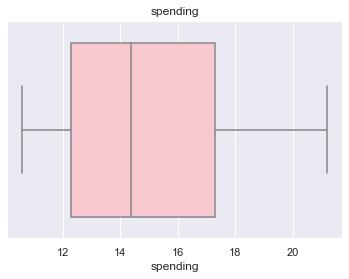

In [20]:
plt.title('spending')
sns.boxplot(first_dataset['spending'],orient='horizondal',color='pink')

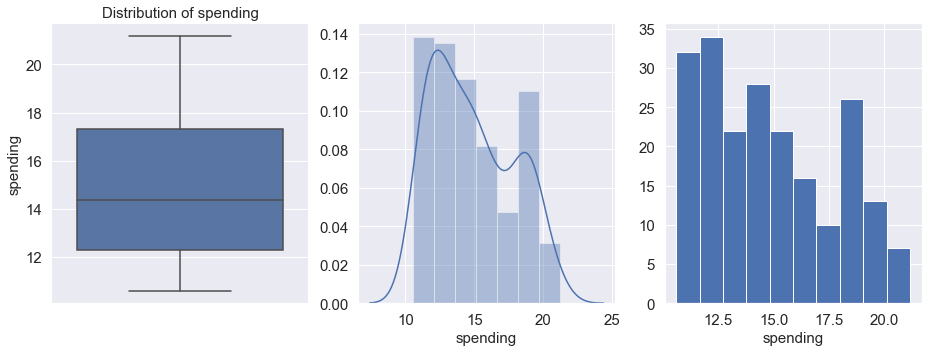

In [21]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='spending',data=first_dataset,orient='v',ax=ax1)
ax1.set_ylabel('spending', fontsize=15)
ax1.set_title('Distribution of spending', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(first_dataset['spending'],ax=ax2)
ax2.set_xlabel('spending', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(first_dataset['spending'])
ax3.set_xlabel('spending', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

---------------

Advance Payments variable

In [22]:
print('Range of values: ', first_dataset['advance_payments'].max()-first_dataset['advance_payments'].min())

Range of values:  4.84


In [23]:
#Central values 
print('Minimum advance_payments: ', first_dataset['advance_payments'].min())
print('Maximum advance_payments: ',first_dataset['advance_payments'].max())
print('Mean value: ', first_dataset['advance_payments'].mean())
print('Median value: ',first_dataset['advance_payments'].median())
print('Standard deviation: ', first_dataset['advance_payments'].std())
print('Null values: ',first_dataset['advance_payments'].isnull().any())

Minimum advance_payments:  12.41
Maximum advance_payments:  17.25
Mean value:  14.559285714285727
Median value:  14.32
Standard deviation:  1.305958726564022
Null values:  False


In [26]:
#Quartiles
Q1=first_dataset['advance_payments'].quantile(q=0.25)
Q3=first_dataset['advance_payments'].quantile(q=0.75)
print('advance_payments - 1st Quartile (Q1) is: ', Q1)
print('advance_payments - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of advance_payments is ', stats.iqr(first_dataset['advance_payments']))

advance_payments - 1st Quartile (Q1) is:  13.45
advance_payments - 3st Quartile (Q3) is:  15.715
Interquartile range (IQR) of advance_payments is  2.2650000000000006


In [27]:
#Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in advance_payments: ', L_outliers)
print('Upper outliers in advance_payments: ', U_outliers)

Lower outliers in advance_payments:  10.052499999999998
Upper outliers in advance_payments:  19.1125


In [28]:
print('Number of outliers in advance_payments upper : ', first_dataset[first_dataset['advance_payments']>19.1125]['advance_payments'].count())
print('Number of outliers in advance_payments lower : ', first_dataset[first_dataset['advance_payments']<10.052499]['advance_payments'].count())
print('% of Outlier in advance_payments upper: ',round(first_dataset[first_dataset['advance_payments']>19.1125]['advance_payments'].count()*100/len(first_dataset)), '%')
print('% of Outlier in advance_payments lower: ',round(first_dataset[first_dataset['advance_payments']<10.052499]['advance_payments'].count()*100/len(first_dataset)), '%')

Number of outliers in advance_payments upper :  0
Number of outliers in advance_payments lower :  0
% of Outlier in advance_payments upper:  0.0 %
% of Outlier in advance_payments lower:  0.0 %


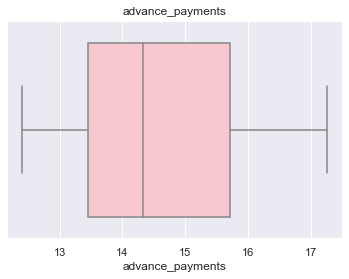

In [30]:
plt.title('advance_payments')
sns.boxplot(first_dataset['advance_payments'],orient='horizondal',color='pink')

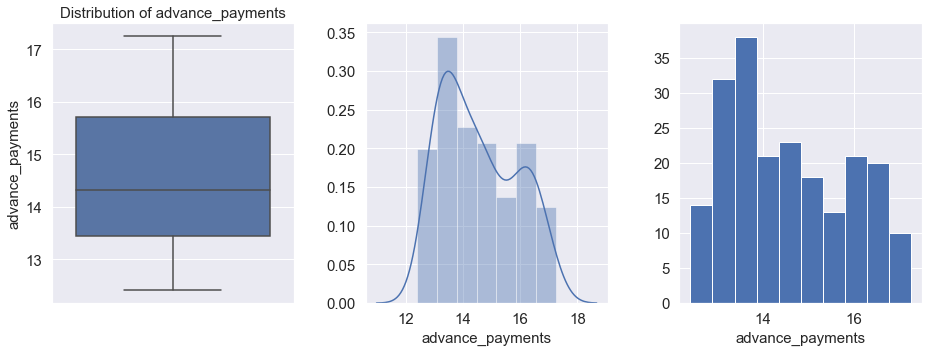

In [31]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='advance_payments',data=first_dataset,orient='v',ax=ax1)
ax1.set_ylabel('advance_payments', fontsize=15)
ax1.set_title('Distribution of advance_payments', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(first_dataset['advance_payments'],ax=ax2)
ax2.set_xlabel('advance_payments', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(first_dataset['advance_payments'])
ax3.set_xlabel('advance_payments', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

----------------

probability_of_full_payment variable

In [33]:
print('Range of values: ', first_dataset['probability_of_full_payment'].max()-first_dataset['probability_of_full_payment'].min())

Range of values:  0.11019999999999996


In [34]:
#Central values 
print('Minimum probability_of_full_payment ', first_dataset['probability_of_full_payment'].min())
print('Maximum probability_of_full_payment: ',first_dataset['probability_of_full_payment'].max())
print('Mean value: ', first_dataset['probability_of_full_payment'].mean())
print('Median value: ',first_dataset['probability_of_full_payment'].median())
print('Standard deviation: ', first_dataset['probability_of_full_payment'].std())
print('Null values: ',first_dataset['probability_of_full_payment'].isnull().any())

Minimum probability_of_full_payment  0.8081
Maximum probability_of_full_payment:  0.9183
Mean value:  0.8709985714285714
Median value:  0.8734500000000001
Standard deviation:  0.023629416583846496
Null values:  False


In [35]:
#Quartiles

Q1=first_dataset['probability_of_full_payment'].quantile(q=0.25)
Q3=first_dataset['probability_of_full_payment'].quantile(q=0.75)
print('probability_of_full_payment - 1st Quartile (Q1) is: ', Q1)
print('probability_of_full_payment - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of probability_of_full_payment is ', stats.iqr(first_dataset['probability_of_full_payment']))

probability_of_full_payment - 1st Quartile (Q1) is:  0.8569
probability_of_full_payment - 3st Quartile (Q3) is:  0.887775
Interquartile range (IQR) of probability_of_full_payment is  0.030874999999999986


In [36]:
#Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in probability_of_full_payment: ', L_outliers)
print('Upper outliers in probability_of_full_payment: ', U_outliers)

Lower outliers in probability_of_full_payment:  0.8105875
Upper outliers in probability_of_full_payment:  0.9340875


In [37]:
print('Number of outliers in probability_of_full_payment upper : ', first_dataset[first_dataset['probability_of_full_payment']>0.9340875]['probability_of_full_payment'].count())
print('Number of outliers in probability_of_full_payment lower : ', first_dataset[first_dataset['probability_of_full_payment']<0.8105875]['probability_of_full_payment'].count())
print('% of Outlier in probability_of_full_payment upper: ',round(first_dataset[first_dataset['probability_of_full_payment']>0.9340875]['probability_of_full_payment'].count()*100/len(first_dataset)), '%')
print('% of Outlier in probability_of_full_payment lower: ',round(first_dataset[first_dataset['probability_of_full_payment']<0.8105875]['probability_of_full_payment'].count()*100/len(first_dataset)), '%')

Number of outliers in probability_of_full_payment upper :  0
Number of outliers in probability_of_full_payment lower :  3
% of Outlier in probability_of_full_payment upper:  0.0 %
% of Outlier in probability_of_full_payment lower:  1.0 %


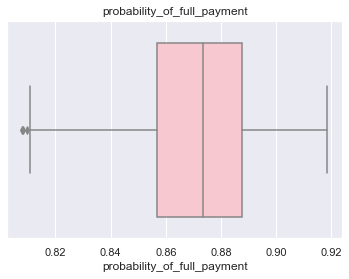

In [39]:
plt.title('probability_of_full_payment')
sns.boxplot(first_dataset['probability_of_full_payment'],orient='horizondal',color='pink')

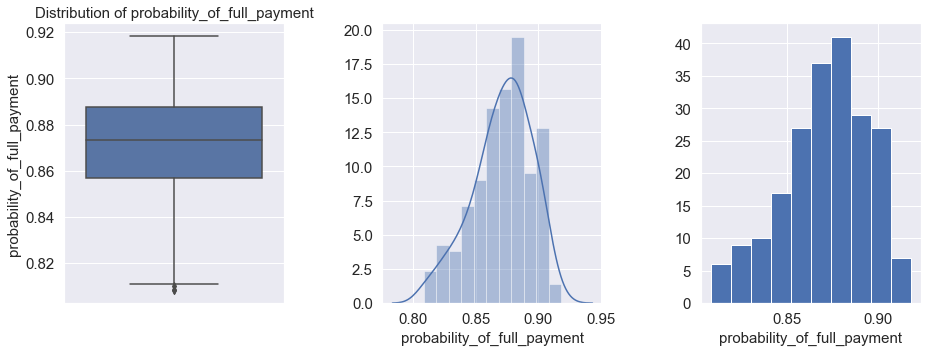

In [40]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='probability_of_full_payment',data=first_dataset,orient='v',ax=ax1)
ax1.set_ylabel('probability_of_full_payment', fontsize=15)
ax1.set_title('Distribution of probability_of_full_payment', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(first_dataset['probability_of_full_payment'],ax=ax2)
ax2.set_xlabel('probability_of_full_payment', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(first_dataset['probability_of_full_payment'])
ax3.set_xlabel('probability_of_full_payment', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

_______________

current_balance variable

In [42]:
print('Range of values: ', first_dataset['current_balance'].max()-first_dataset['current_balance'].min())

Range of values:  1.7759999999999998


In [43]:
#Central values 
print('Minimum current_balance: ', first_dataset['current_balance'].min())
print('Maximum current_balance: ',first_dataset['current_balance'].max())
print('Mean value: ', first_dataset['current_balance'].mean())
print('Median value: ',first_dataset['current_balance'].median())
print('Standard deviation: ', first_dataset['current_balance'].std())
print('Null values: ',first_dataset['current_balance'].isnull().any())

Minimum current_balance:  4.899
Maximum current_balance:  6.675
Mean value:  5.628533333333334
Median value:  5.5235
Standard deviation:  0.4430634777264493
Null values:  False


In [44]:
#Quartiles

Q1=first_dataset['current_balance'].quantile(q=0.25)
Q3=first_dataset['current_balance'].quantile(q=0.75)
print('current_balance - 1st Quartile (Q1) is: ', Q1)
print('current_balance - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of current_balance is ', stats.iqr(first_dataset['current_balance']))

current_balance - 1st Quartile (Q1) is:  5.26225
current_balance - 3st Quartile (Q3) is:  5.97975
Interquartile range (IQR) of current_balance is  0.7175000000000002


In [45]:
#Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in current_balance: ', L_outliers)
print('Upper outliers in current_balance: ', U_outliers)

Lower outliers in current_balance:  4.186
Upper outliers in current_balance:  7.056000000000001


In [46]:
print('Number of outliers in current_balance upper : ', first_dataset[first_dataset['current_balance']>7.056000000000001]['current_balance'].count())
print('Number of outliers in current_balance lower : ', first_dataset[first_dataset['current_balance']<4.186]['current_balance'].count())
print('% of Outlier in current_balance upper: ',round(first_dataset[first_dataset['current_balance']>7.056000000000001]['current_balance'].count()*100/len(first_dataset)), '%')
print('% of Outlier in current_balance lower: ',round(first_dataset[first_dataset['current_balance']<4.186]['current_balance'].count()*100/len(first_dataset)), '%')

Number of outliers in current_balance upper :  0
Number of outliers in current_balance lower :  0
% of Outlier in current_balance upper:  0.0 %
% of Outlier in current_balance lower:  0.0 %


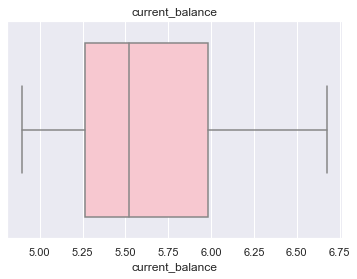

In [48]:
plt.title('current_balance')
sns.boxplot(first_dataset['current_balance'],orient='horizondal',color='pink')

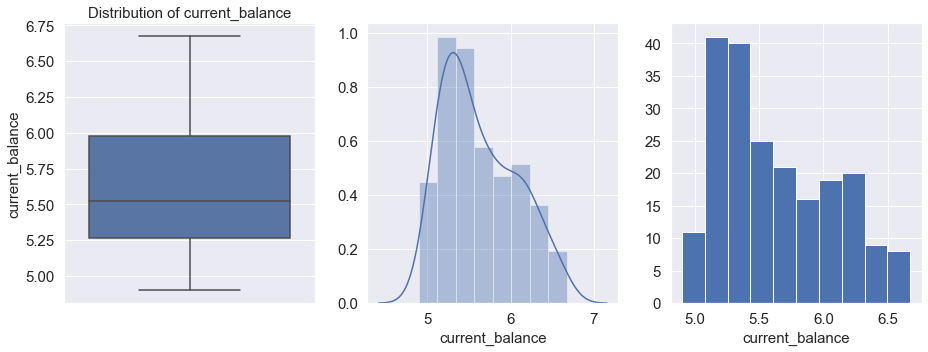

In [49]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='current_balance',data=first_dataset,orient='v',ax=ax1)
ax1.set_ylabel('current_balance', fontsize=15)
ax1.set_title('Distribution of current_balance', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(first_dataset['current_balance'],ax=ax2)
ax2.set_xlabel('current_balance', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(first_dataset['current_balance'])
ax3.set_xlabel('current_balance', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

______________

credit_limit variable

In [50]:
print('Range of values: ', first_dataset['credit_limit'].max()-first_dataset['credit_limit'].min())

Range of values:  1.4030000000000005


In [51]:
#Central values 
print('Minimum credit_limit: ', first_dataset['credit_limit'].min())
print('Maximum credit_limit: ',first_dataset['credit_limit'].max())
print('Mean value: ', first_dataset['credit_limit'].mean())
print('Median value: ',first_dataset['credit_limit'].median())
print('Standard deviation: ', first_dataset['credit_limit'].std())
print('Null values: ',first_dataset['credit_limit'].isnull().any())

Minimum credit_limit:  2.63
Maximum credit_limit:  4.033
Mean value:  3.258604761904763
Median value:  3.237
Standard deviation:  0.3777144449065874
Null values:  False


In [52]:
#Quartiles

Q1=first_dataset['credit_limit'].quantile(q=0.25)
Q3=first_dataset['credit_limit'].quantile(q=0.75)
print('credit_limit - 1st Quartile (Q1) is: ', Q1)
print('credit_limit - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of credit_limit is ', stats.iqr(first_dataset['credit_limit']))

credit_limit - 1st Quartile (Q1) is:  2.944
credit_limit - 3st Quartile (Q3) is:  3.56175
Interquartile range (IQR) of credit_limit is  0.61775


In [53]:
#Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in credit_limit: ', L_outliers)
print('Upper outliers in credit_limit: ', U_outliers)

Lower outliers in credit_limit:  2.017375
Upper outliers in credit_limit:  4.488375


In [54]:
print('Number of outliers in credit_limit upper : ', first_dataset[first_dataset['credit_limit']>4.488375]['credit_limit'].count())
print('Number of outliers in credit_limit lower : ', first_dataset[first_dataset['credit_limit']<2.017375]['credit_limit'].count())
print('% of Outlier in credit_limit upper: ',round(first_dataset[first_dataset['credit_limit']>4.488375]['credit_limit'].count()*100/len(first_dataset)), '%')
print('% of Outlier in credit_limit lower: ',round(first_dataset[first_dataset['credit_limit']<2.017375]['credit_limit'].count()*100/len(first_dataset)), '%')

Number of outliers in credit_limit upper :  0
Number of outliers in credit_limit lower :  0
% of Outlier in credit_limit upper:  0.0 %
% of Outlier in credit_limit lower:  0.0 %


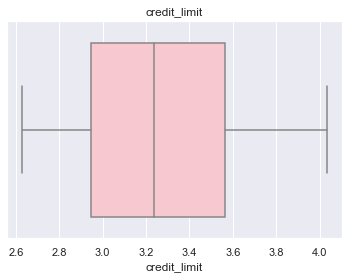

In [56]:
plt.title('credit_limit')
sns.boxplot(first_dataset['credit_limit'],orient='horizondal',color='pink')

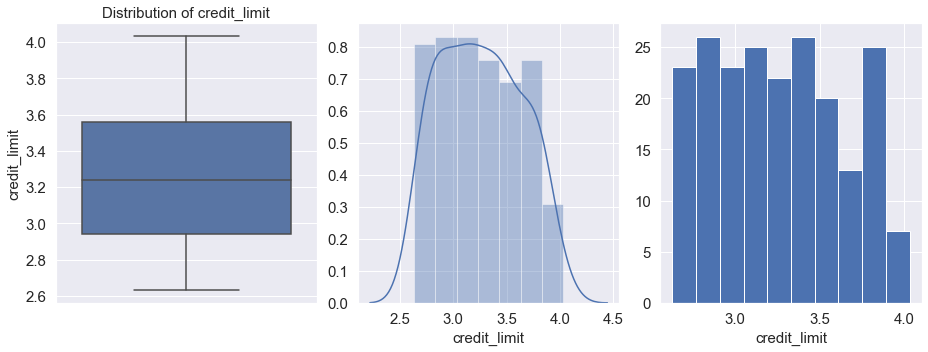

In [57]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='credit_limit',data=first_dataset,orient='v',ax=ax1)
ax1.set_ylabel('credit_limit', fontsize=15)
ax1.set_title('Distribution of credit_limit', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(first_dataset['credit_limit'],ax=ax2)
ax2.set_xlabel('credit_limit', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(first_dataset['credit_limit'])
ax3.set_xlabel('credit_limit', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

------------

min_payment_amt variable

In [59]:
print('Range of values: ', first_dataset['min_payment_amt'].max()-first_dataset['min_payment_amt'].min())

Range of values:  7.690899999999999


In [60]:
#Central values 
print('Minimum min_payment_amt: ', first_dataset['min_payment_amt'].min())
print('Maximum min_payment_amt: ',first_dataset['min_payment_amt'].max())
print('Mean value: ', first_dataset['min_payment_amt'].mean())
print('Median value: ',first_dataset['min_payment_amt'].median())
print('Standard deviation: ', first_dataset['min_payment_amt'].std())
print('Null values: ',first_dataset['min_payment_amt'].isnull().any())

Minimum min_payment_amt:  0.7651
Maximum min_payment_amt:  8.456
Mean value:  3.7002009523809507
Median value:  3.599
Standard deviation:  1.5035571308217792
Null values:  False


In [61]:
#Quartiles

Q1=first_dataset['min_payment_amt'].quantile(q=0.25)
Q3=first_dataset['min_payment_amt'].quantile(q=0.75)
print('min_payment_amt - 1st Quartile (Q1) is: ', Q1)
print('min_payment_amt - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of min_payment_amt is ', stats.iqr(first_dataset['min_payment_amt']))

min_payment_amt - 1st Quartile (Q1) is:  2.5614999999999997
min_payment_amt - 3st Quartile (Q3) is:  4.76875
Interquartile range (IQR) of min_payment_amt is  2.20725


In [62]:
#Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in min_payment_amt: ', L_outliers)
print('Upper outliers in min_payment_amt: ', U_outliers)

Lower outliers in min_payment_amt:  -0.7493750000000006
Upper outliers in min_payment_amt:  8.079625


In [63]:
print('Number of outliers in min_payment_amt upper : ', first_dataset[first_dataset['min_payment_amt']>8.079625]['min_payment_amt'].count())
print('Number of outliers in min_payment_amt lower : ', first_dataset[first_dataset['min_payment_amt']<-0.749375]['min_payment_amt'].count())
print('% of Outlier in min_payment_amt upper: ',round(first_dataset[first_dataset['min_payment_amt']>8.079625]['min_payment_amt'].count()*100/len(first_dataset)), '%')
print('% of Outlier in min_payment_amt lower: ',round(first_dataset[first_dataset['min_payment_amt']<-0.749375]['min_payment_amt'].count()*100/len(first_dataset)), '%')

Number of outliers in min_payment_amt upper :  2
Number of outliers in min_payment_amt lower :  0
% of Outlier in min_payment_amt upper:  1.0 %
% of Outlier in min_payment_amt lower:  0.0 %


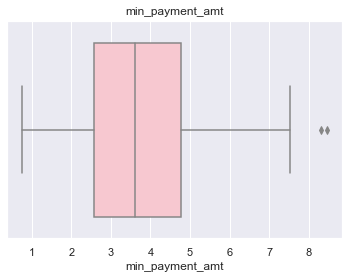

In [64]:
plt.title('min_payment_amt')
sns.boxplot(first_dataset['min_payment_amt'],orient='horizondal',color='pink')


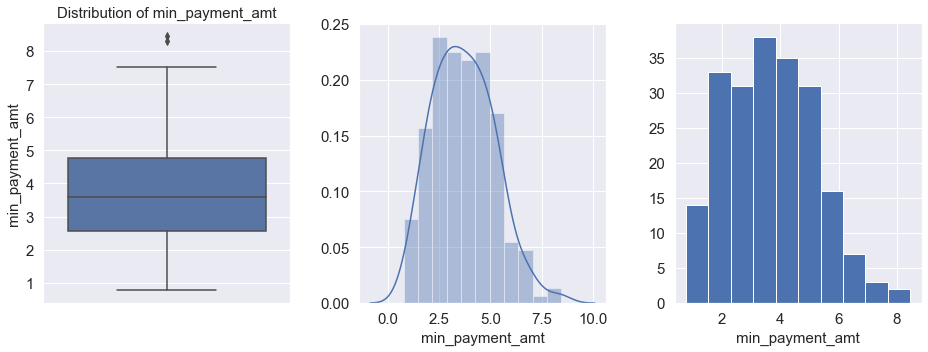

In [65]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='min_payment_amt',data=first_dataset,orient='v',ax=ax1)
ax1.set_ylabel('min_payment_amt', fontsize=15)
ax1.set_title('Distribution of min_payment_amt', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(first_dataset['min_payment_amt'],ax=ax2)
ax2.set_xlabel('min_payment_amt', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(first_dataset['min_payment_amt'])
ax3.set_xlabel('min_payment_amt', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

________

max_spent_in_single_shopping variable

In [66]:
print('Range of values: ', first_dataset['max_spent_in_single_shopping'].max()-first_dataset['max_spent_in_single_shopping'].min())

Range of values:  2.0309999999999997


In [68]:
#Central values 
print('Minimum max_spent_in_single_shopping: ', first_dataset['max_spent_in_single_shopping'].min())
print('Maximum max_spent_in_single_shoppings: ',first_dataset['max_spent_in_single_shopping'].max())
print('Mean value: ', first_dataset['max_spent_in_single_shopping'].mean())
print('Median value: ',first_dataset['max_spent_in_single_shopping'].median())
print('Standard deviation: ', first_dataset['max_spent_in_single_shopping'].std())
print('Null values: ',first_dataset['max_spent_in_single_shopping'].isnull().any())

Minimum max_spent_in_single_shopping:  4.519
Maximum max_spent_in_single_shoppings:  6.55
Mean value:  5.408071428571429
Median value:  5.223000000000001
Standard deviation:  0.4914804991024054
Null values:  False


In [69]:
#Quartiles

Q1=first_dataset['max_spent_in_single_shopping'].quantile(q=0.25)
Q3=first_dataset['max_spent_in_single_shopping'].quantile(q=0.75)
print('max_spent_in_single_shopping - 1st Quartile (Q1) is: ', Q1)
print('max_spent_in_single_shopping - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of max_spent_in_single_shopping is ', stats.iqr(first_dataset['max_spent_in_single_shopping']))

max_spent_in_single_shopping - 1st Quartile (Q1) is:  5.045
max_spent_in_single_shopping - 3st Quartile (Q3) is:  5.877000000000001
Interquartile range (IQR) of max_spent_in_single_shopping is  0.8320000000000007


In [70]:
#Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in max_spent_in_single_shopping: ', L_outliers)
print('Upper outliers in max_spent_in_single_shopping: ', U_outliers)

Lower outliers in max_spent_in_single_shopping:  3.796999999999999
Upper outliers in max_spent_in_single_shopping:  7.125000000000002


In [71]:
print('Number of outliers in max_spent_in_single_shopping upper : ', first_dataset[first_dataset['max_spent_in_single_shopping']>7.125000000000002]['max_spent_in_single_shopping'].count())
print('Number of outliers in max_spent_in_single_shopping lower : ', first_dataset[first_dataset['max_spent_in_single_shopping']<3.796999999999999]['max_spent_in_single_shopping'].count())
print('% of Outlier in max_spent_in_single_shopping upper: ',round(first_dataset[first_dataset['max_spent_in_single_shopping']>7.125000000000002]['max_spent_in_single_shopping'].count()*100/len(first_dataset)), '%')
print('% of Outlier in max_spent_in_single_shopping lower: ',round(first_dataset[first_dataset['max_spent_in_single_shopping']<3.796999999999999]['max_spent_in_single_shopping'].count()*100/len(first_dataset)), '%')

Number of outliers in max_spent_in_single_shopping upper :  0
Number of outliers in max_spent_in_single_shopping lower :  0
% of Outlier in max_spent_in_single_shopping upper:  0.0 %
% of Outlier in max_spent_in_single_shopping lower:  0.0 %


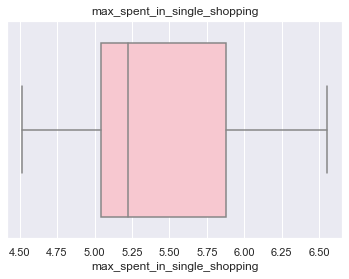

In [72]:
plt.title('max_spent_in_single_shopping')
sns.boxplot(first_dataset['max_spent_in_single_shopping'],orient='horizondal',color='pink')

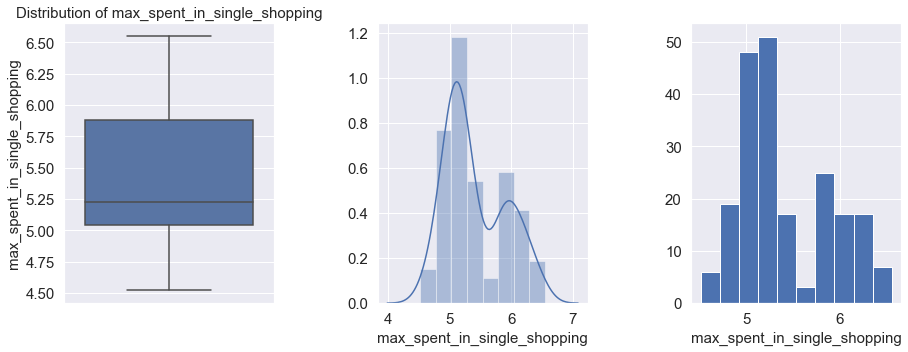

In [73]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='max_spent_in_single_shopping',data=first_dataset,orient='v',ax=ax1)
ax1.set_ylabel('max_spent_in_single_shopping', fontsize=15)
ax1.set_title('Distribution of max_spent_in_single_shopping', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(first_dataset['max_spent_in_single_shopping'],ax=ax2)
ax2.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(first_dataset['max_spent_in_single_shopping'])
ax3.set_xlabel('max_spent_in_single_shopping', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

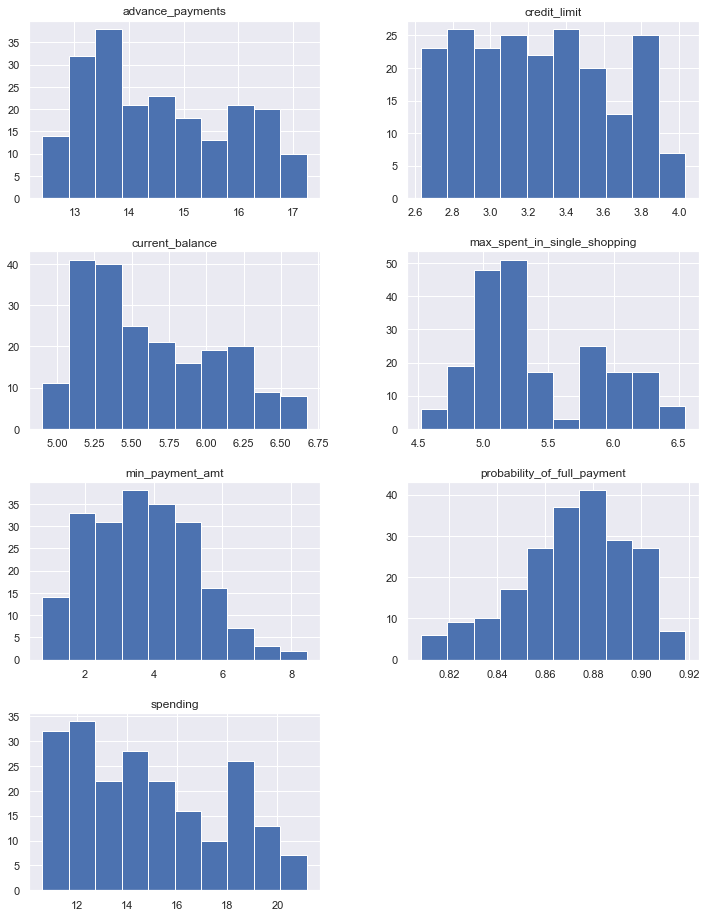

In [74]:
first_dataset.hist(figsize=(12,16),layout=(4,2));

In [77]:
#Skewness Value

In [76]:
first_dataset.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

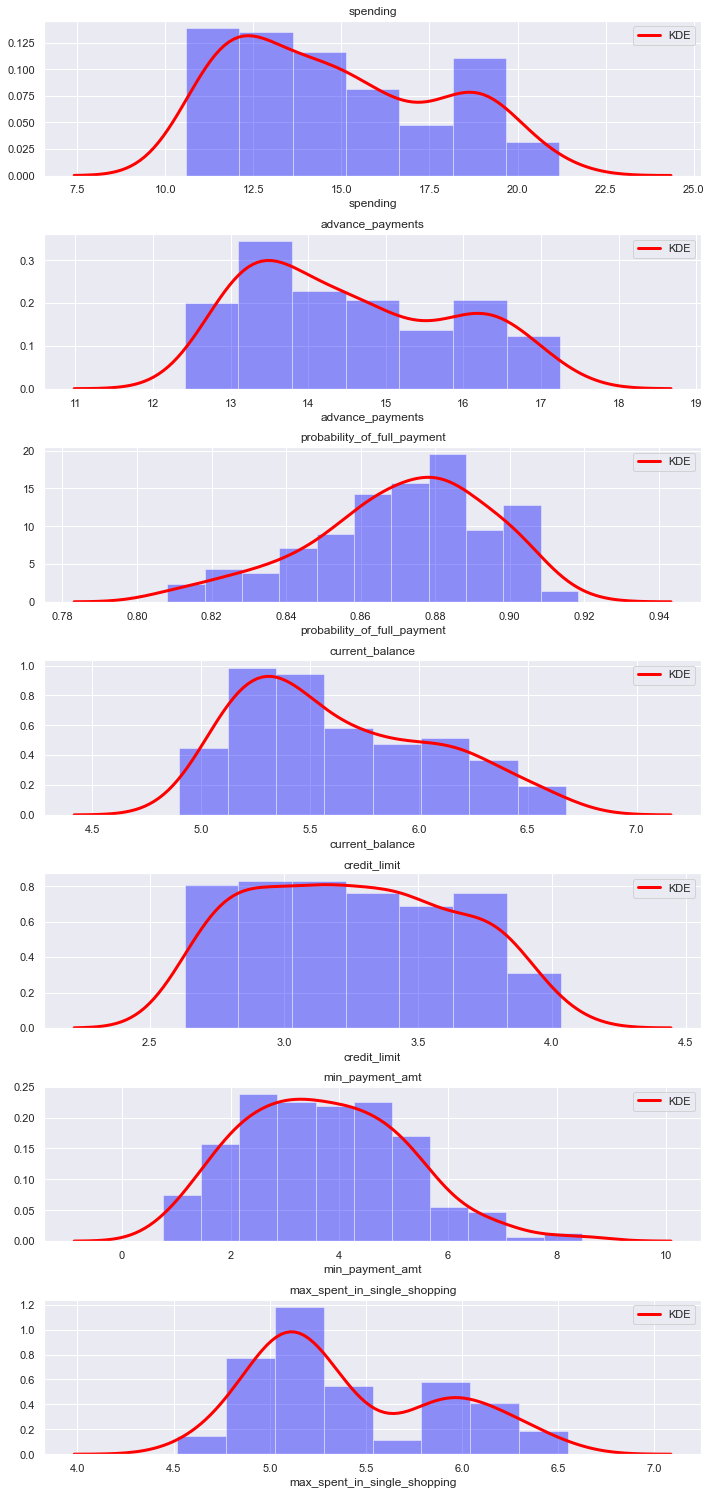

In [83]:
plt.figure(figsize=(10,50))
for i in range(len(first_dataset.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(first_dataset[first_dataset.columns[i]], kde_kws={"color": "red", "lw": 3, "label": "KDE"}, hist_kws={"color": "blue"})
  plt.title(first_dataset.columns[i])

plt.tight_layout()

------------------------------

Multivariate Analysis

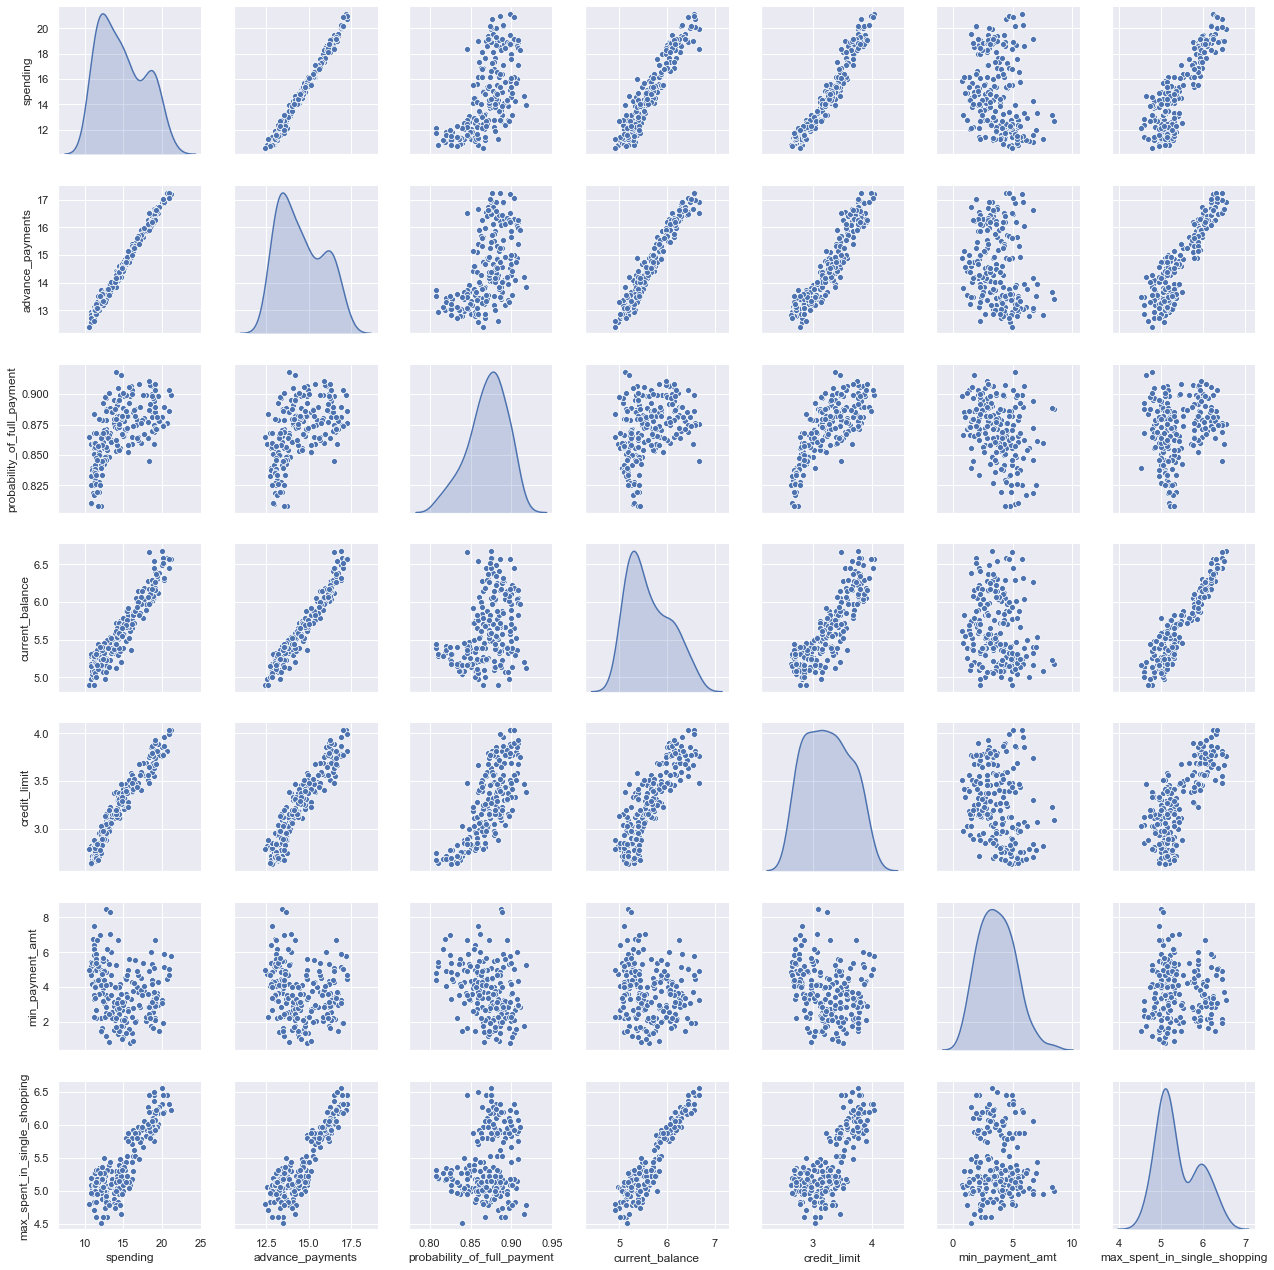

In [82]:
sns.pairplot(first_dataset,diag_kind='kde');

In [84]:
#correlation matrix

first_dataset.corr().T

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


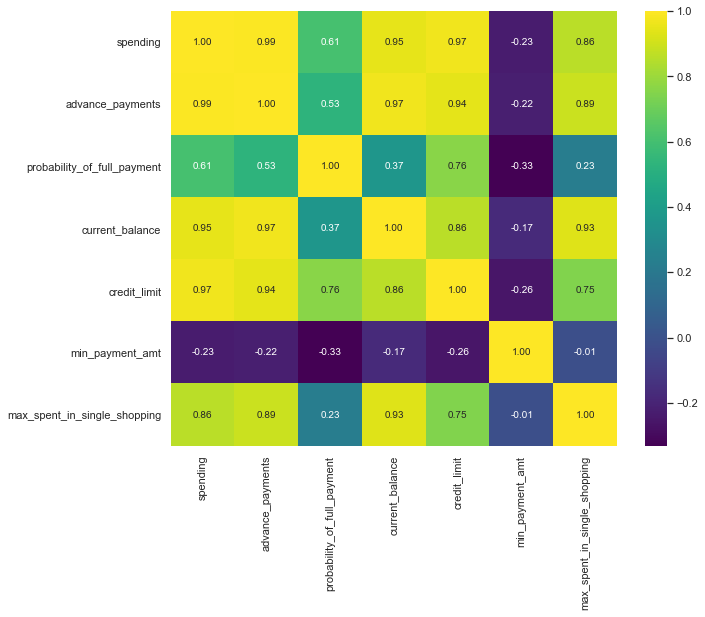

In [85]:
plt.figure(figsize=(10,8))
sns.heatmap(first_dataset.corr(),annot=True,fmt=".2f",cmap="viridis")
plt.show()

In [86]:
c = first_dataset.corr().abs()
s = c.unstack() # 
so = s.sort_values(ascending=False)
so=so[(so<1) & (so>0.3)].drop_duplicates().to_frame()
so.columns = ['correlation']
so

,,correlation
spending,advance_payments,0.994341
advance_payments,current_balance,0.972422
credit_limit,spending,0.970771
spending,current_balance,0.949985
credit_limit,advance_payments,0.944829
max_spent_in_single_shopping,current_balance,0.932806
advance_payments,max_spent_in_single_shopping,0.890784
spending,max_spent_in_single_shopping,0.863693
current_balance,credit_limit,0.860415
probability_of_full_payment,credit_limit,0.761635


In [87]:
#Removing the outliers

In [17]:
new_dataset=first_dataset.copy()

In [90]:
def new_outliers(data):
    vData_num = data.loc[:,data.columns != 'class']
    Q1 = vData_num.quantile(0.25)
    Q3 = vData_num.quantile(0.75)
    IQR = Q3 - Q1
    count = 0
    vData_num_mod = ((vData_num < (Q1 - 1.5 * IQR)) |(vData_num > (Q3 + 1.5 * IQR)))
    for col in vData_num_mod:
        if(1 in vData_num_mod[col].value_counts().index):
            print("No. of outliers in %s: %d" %( col, vData_num_mod[col].value_counts().iloc[1]))
            count += 1
    print("\n\nNo of attributes with outliers are :", count)
    
new_outliers(first_dataset)

No. of outliers in probability_of_full_payment: 3
No. of outliers in min_payment_amt: 2


No of attributes with outliers are : 2


In [93]:
new_dataset[column].replace(new_dataset.loc[(new_dataset[column] > Q3+1.5*IQR)|(new_dataset[column] < Q1-1.5*IQR), column], new_dataset[column].median())

NameError: name 'column' is not defined

In [94]:
new_outliers(new_dataset)

No. of outliers in probability_of_full_payment: 3
No. of outliers in min_payment_amt: 2


No of attributes with outliers are : 2


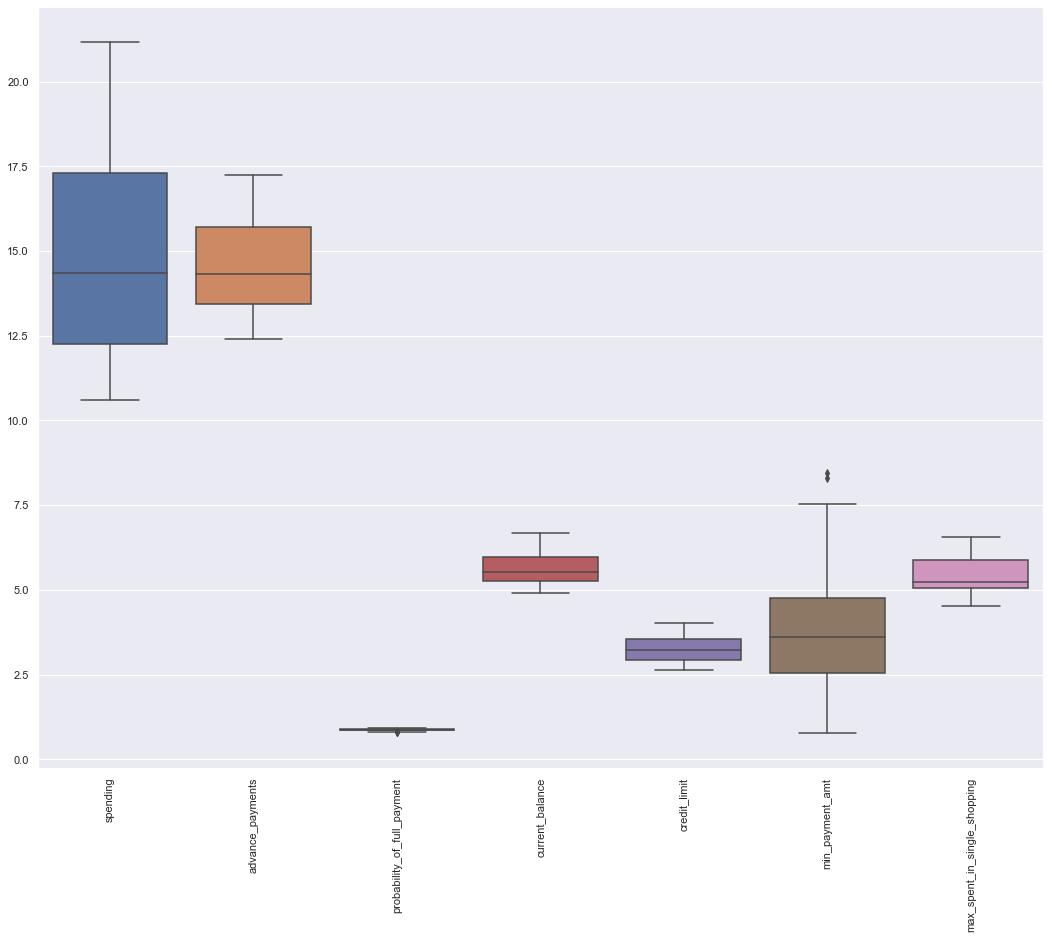

In [95]:
#Checking the presence of outlier in new dataset
plt.figure(figsize=(18,14))
box = sns.boxplot(data=new_dataset)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

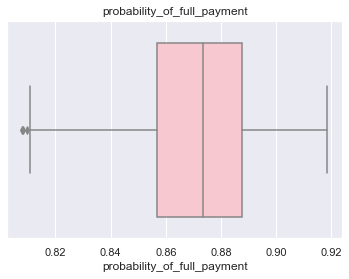

In [97]:
plt.title('probability_of_full_payment')
sns.boxplot(new_dataset['probability_of_full_payment'],orient='horizondal',color='pink')

----------------------------------

1.2  Do you think scaling is necessary for clustering in this case? Justify

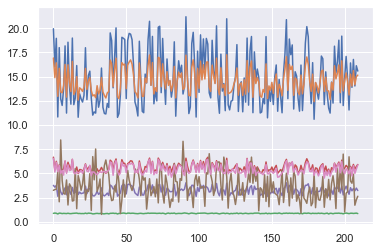

In [9]:
plt.plot(new_dataset)
plt.show()

In [7]:
from scipy.stats import zscore
new_dataset_Scaled=first_dataset.apply(zscore)
new_dataset_Scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


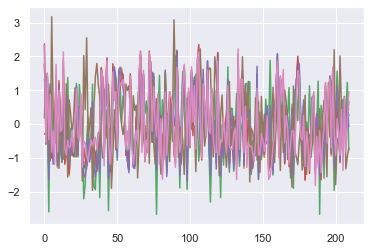

In [10]:
plt.plot(new_dataset_Scaled)
plt.show()

________________________________________

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
link_method = linkage(new_dataset_Scaled, method = 'average')

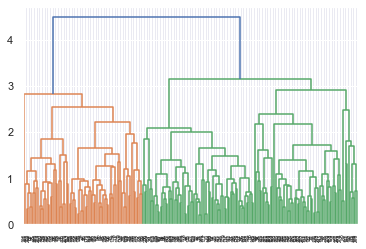

In [13]:
dend = dendrogram(link_method)

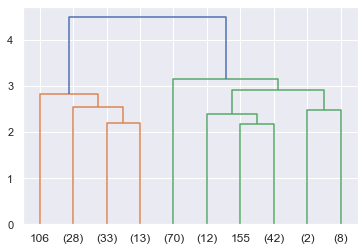

In [26]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10)

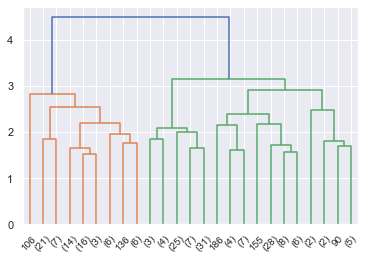

In [27]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 25)

In [19]:
from scipy.cluster.hierarchy import fcluster

In [20]:
clusters_3 = fcluster(link_method, 3, criterion='maxclust')
clusters_3

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [21]:
cluster3_dataset=first_dataset.copy()

In [22]:
cluster3_dataset['clusters-3'] = clusters_3

In [23]:
cluster3_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [24]:
cluster3_dataset['clusters-3'].value_counts().sort_index()

1    75
2    70
3    65
Name: clusters-3, dtype: int64

In [25]:
aggdata=cluster3_dataset.groupby('clusters-3').mean()
aggdata['Freq']=cluster3_dataset['clusters-3'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-3,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


In [ ]:
aggdata=cluster3_dataset.groupby('clusters-3').mean()
aggdata['Freq']=cluster3_dataset['clusters-3'].value_counts().sort_index()
aggdata

We for cluster grouping based on the dendrogram, 3 or 4 looks good. 
Also in real time, there colud have been more variables value captured - tenure, BALANCE_FREQUENCY, balance, purchase, installment of purchase, others.
And three group cluster solution gives a pattern based on high/medium/low spending with max_spent_in_single_shopping (high value item) and probability_of_full_payment(payment made)

--------------

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [30]:
from sklearn.cluster import KMeans

In [31]:
k_means = KMeans(n_clusters = 1)
k_means.fit(new_dataset_Scaled)
k_means.inertia_

1469.9999999999998

In [33]:
k_means = KMeans(n_clusters = 2)
k_means.fit(new_dataset_Scaled)
k_means.inertia_

659.171754487041

In [83]:
k_means = KMeans(n_clusters = 3)
k_means.fit(new_dataset_Scaled)
k_means.inertia_

430.6589731513006

In [84]:
k_means = KMeans(n_clusters = 4)
k_means.fit(new_dataset_Scaled)
k_means.inertia_

371.30172127754196

In [35]:
wss =[]

In [36]:
for i in range(1,11):
        KM = KMeans(n_clusters=i)
        KM.fit(new_dataset_Scaled)
        wss.append(KM.inertia_)

In [37]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.1846125351018,
 327.189811088249,
 289.2117264135496,
 262.7817187928191,
 241.78144613873923,
 221.7436899202956,
 208.43550901741918]

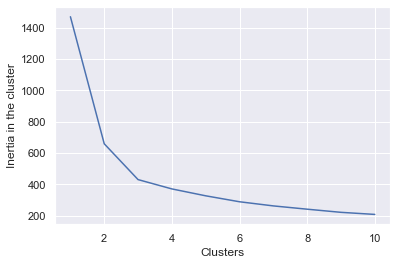

In [38]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [40]:
k_means_4 = KMeans(n_clusters = 4)
k_means_4.fit(new_dataset_Scaled)
labels_4 = k_means_4.labels_

In [41]:
kmeans4_dataset=first_dataset.copy()

In [42]:
kmeans4_dataset["Clus_kmeans"] = labels_4
kmeans4_dataset.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0


In [43]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [45]:
silhouette_score(new_dataset_Scaled,labels_4)

0.3369008229710853

In [46]:
from sklearn import metrics

In [47]:
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(new_dataset_Scaled)
    scores.append(metrics.silhouette_score(new_dataset_Scaled, km.labels_))
    
scores

[0.46577247686580914,
 0.4007270552751299,
 0.3291966792017613,
 0.28316654897654814,
 0.2897583830272518,
 0.2694844355168535,
 0.25437316027505635,
 0.2623959398663564,
 0.2673980772529917]

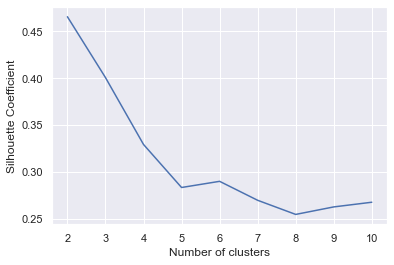

In [48]:
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Thus, we can concluded that from the silhouette score that the optimal cluster could be 3 or 4.From SC Score, the number of optimal clusters could be 3 or 4

In [49]:
sil_width = silhouette_samples(new_dataset_Scaled,labels_4)

In [50]:
kmeans4_dataset["sil_width"] = sil_width
kmeans4_dataset.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0,0.472460
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0.072863
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0,0.494127
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0.521986
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0,0.152686


In [51]:
silhouette_samples(new_dataset_Scaled,labels_4).min()

-0.020412913640459072

3 Cluster Solution

In [52]:
km_3 = KMeans(n_clusters=3,random_state=123)

In [54]:
km_3.fit(new_dataset_Scaled)
km_3.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [55]:
pd.Series(km_3.labels_).value_counts()

1    72
2    71
0    67
dtype: int64

K-Means Clustering & Cluster Information

In [56]:
kmeans1_dataset=first_dataset.copy()

In [58]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(new_dataset_Scaled)

In [62]:
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

In [69]:
cluster = pd.DataFrame(y_kmeans1)

In [70]:
kmeans1_dataset['cluster'] = cluster

In [71]:
kmeans_cluster = pd.DataFrame(round(kmeans1_dataset.groupby('cluster').mean(),1))
kmeans_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,18.5,16.2,0.9,6.2,3.7,3.6,6.0
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1
3,14.4,14.3,0.9,5.5,3.3,2.7,5.1


In [68]:
kmeans1_dataset=first_dataset.copy()

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(new_dataset_Scaled)

y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

cluster = pd.DataFrame(y_kmeans1)

kmeans1_dataset['cluster'] = cluster

kmeans_mean_cluster = pd.DataFrame(round(kmeans1_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,18.5,16.2,0.9,6.2,3.7,3.6,6.0
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1
3,14.4,14.3,0.9,5.5,3.3,2.7,5.1


In [73]:
def ClusterPercentage(datafr,name):
    size = pd.Series(datafr[name].value_counts().sort_index())
    percent = pd.Series(round(datafr[name].value_counts()/datafr.shape[0] * 100,2)).sort_index()

    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    
    return(size_df)

In [74]:
ClusterPercentage(kmeans1_dataset,"cluster")

,Cluster_Size,Cluster_Percentage
1,67,31.90
2,72,34.29
3,71,33.81


In [85]:
cluster_3_T = kmeans_mean_cluster.T

In [86]:
cluster_3_T

cluster,1,2,3
spending,18.5,11.9,14.4
advance_payments,16.2,13.2,14.3
probability_of_full_payment,0.9,0.8,0.9
current_balance,6.2,5.2,5.5
credit_limit,3.7,2.8,3.3
min_payment_amt,3.6,4.7,2.7
max_spent_in_single_shopping,6.0,5.1,5.1


_____________

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [76]:
cluster_3_T

cluster,1,2,3
spending,18.5,11.9,14.4
advance_payments,16.2,13.2,14.3
probability_of_full_payment,0.9,0.8,0.9
current_balance,6.2,5.2,5.5
credit_limit,3.7,2.8,3.3
min_payment_amt,3.6,4.7,2.7
max_spent_in_single_shopping,6.0,5.1,5.1


In [80]:
aggdata_w=cluster3_dataset.groupby('clusters-3').mean()
aggdata_w['Freq']=cluster3_dataset['clusters-3'].value_counts().sort_index()
aggdata_w

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-3,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


In [81]:
aggdata_w.T

clusters-3,1,2,3
spending,18.129200,11.916857,14.217077
advance_payments,16.058000,13.291000,14.195846
probability_of_full_payment,0.881595,0.846766,0.884869
current_balance,6.135747,5.258300,5.442000
credit_limit,3.648120,2.846000,3.253508
min_payment_amt,3.650200,4.619000,2.768418
max_spent_in_single_shopping,5.987040,5.115071,5.055569
Freq,75.000000,70.000000,65.000000


Cluster Group Profiles
Group 1 : High Spending
Group 3 : Medium Spending
Group 2 : Low Spending
Promotional strategies for each cluster



Group 1 : High Spending Group
- Giving any reward points might increase their purchases.
- Maximum max_spent_in_single_shopping is high for this group, so can be offered discount/offer on next transactions upon full payment
- Increase their credit limit and 
- Increase spending habits
- Give loan against the credit card, as they are customers with good repayment record.
- Tie up with luxury brands, which will drive more one_time_maximun spending

Group 3 : Medium Spending Group
- They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate. 
- Promote premium cards/loyalty cars to increase transactions.
- Increase spending habits by trying with premium ecommerce sites, travel portal, travel airlines/hotel, as this will encourage them to spend more

Group 2 : Low Spending Group
- Customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate.
- Increase their spending habits by tying up with grocery stores, utilities (electricity, phone, gas, others)
----------------------------------------------------------------------------